In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [27]:
df.shape

(13200, 7)

In [28]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [29]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

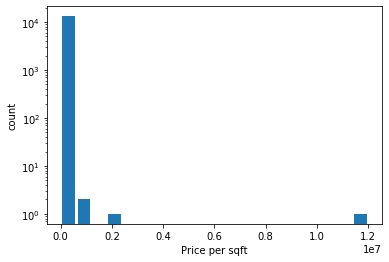

In [32]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("count")
plt.yscale('log')
plt.show()

### Outlier Removal Using Quantile

In [8]:
min_psqft, max_psqft = df.price_per_sqft.quantile([0.001,0.999])
min_psqft, max_psqft

(1366.184, 50959.36200000099)

In [9]:
df_new = df[(df.price_per_sqft < max_psqft) & (df.price_per_sqft > min_psqft)]
df_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [10]:
df_new.shape

(13172, 7)

In [23]:
df.shape[0]-df_new.shape[0]

28

In [11]:
df_new.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12740,Vidyaranyapura,2 BHK,1200.0,2.0,42.00,2,3500
12906,Chamrajpet,3 BHK,1650.0,3.0,115.00,3,6969
6288,Raja Rajeshwari Nagar,2 BHK,1306.0,2.0,44.17,2,3382
8882,HBR Layout,3 BHK,1700.0,3.0,110.00,3,6470
8197,Whitefield,2 BHK,1105.0,2.0,35.36,2,3200
2794,Kadugodi,9 Bedroom,6200.0,9.0,200.00,9,3225
12878,Yelahanka,2 BHK,1360.0,2.0,78.19,2,5749
5321,Whitefield,2 BHK,1255.0,2.0,77.00,2,6135
244,Kothanur,3 BHK,1577.0,3.0,70.00,3,4438
11280,Ambalipura,2 BHK,1060.0,2.0,58.50,2,5518


### Now remove outliers using 4 standard deviation

In [34]:
max_bound = df_new.price_per_sqft.mean() + 4* df_new.price_per_sqft.std()
min_bound = df_new.price_per_sqft.mean() - 4*df_new.price_per_sqft.std()

max_bound,min_bound

(23227.73653589429, -9900.429065502549)

In [35]:
df_new[(df_new.price_per_sqft>max_bound) | (df_new.price_per_sqft<min_bound)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6597,other,2 BHK,1030.0,2.0,300.0,2,29126
5974,other,4 Bedroom,2360.0,4.0,650.0,4,27542
12900,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509
11661,other,4 Bedroom,1200.0,4.0,375.0,4,31250
9907,other,8 Bedroom,600.0,4.0,175.0,8,29166
6744,HAL 2nd Stage,2 Bedroom,600.0,3.0,145.0,2,24166
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
8083,other,3 BHK,2750.0,3.0,943.0,3,34290
7908,HAL 2nd Stage,7 Bedroom,1000.0,7.0,250.0,7,25000
12631,Rajaji Nagar,5 Bedroom,2500.0,4.0,650.0,5,26000


In [39]:
df3 = df_new[(df_new.price_per_sqft < max_bound) & (df_new.price_per_sqft > min_bound)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [40]:
df3.shape

(13047, 7)

In [42]:
df_new.shape[0] - df3.shape[0]

125

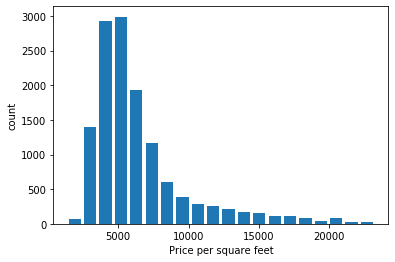

In [45]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("count")
plt.show()

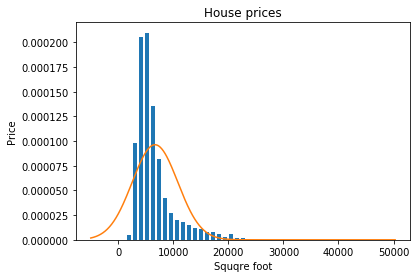

In [46]:
from scipy.stats import norm
import numpy as np
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)

plt.xlabel("Squqre foot")
plt.ylabel("Price")
plt.title("House prices")

rng = np.arange(-5000, df_new.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df_new.price_per_sqft.mean(),df_new.price_per_sqft.std()))

### Now remove outliers using z score. Using z score of 4 as thresold

In [48]:
df_new['zscore'] = (df_new.price_per_sqft - df_new.price_per_sqft.mean())/df_new.price_per_sqft.std()
df_new.sample(10)

C:\Users\shashi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
314,Whitefield,2 BHK,1280.0,2.0,75.0,2,5859,-0.194313
11695,Yelahanka,3 BHK,1355.0,2.0,75.0,3,5535,-0.272554
9304,Hosa Road,3 BHK,1730.0,3.0,72.6,3,4196,-0.595905
630,Singasandra,3 BHK,1440.0,2.0,65.0,3,4513,-0.519354
11120,other,4 Bedroom,1200.0,4.0,165.0,4,13750,1.711256
3436,Somasundara Palya,2 BHK,1174.0,2.0,74.0,2,6303,-0.087093
2823,TC Palaya,2 Bedroom,900.0,2.0,55.0,2,6111,-0.133458
9729,2nd Stage Nagarbhavi,5 Bedroom,1200.0,4.0,240.0,5,20000,3.220546
8131,other,3 BHK,1320.0,2.0,55.0,3,4166,-0.603149
2271,Subramanyapura,3 BHK,1245.0,2.0,68.0,3,5461,-0.290424


In [49]:
outliers_z = df_new[(df_new.zscore < -4) | (df_new.zscore>4)]
outliers_z.shape

(125, 8)

In [50]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7561,KR Puram,8 Bedroom,1500.0,7.0,382.0,8,25466,4.540510
5974,other,4 Bedroom,2360.0,4.0,650.0,4,27542,5.041836
8083,other,3 BHK,2750.0,3.0,943.0,3,34290,6.671386
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218
9636,other,4 Bedroom,2100.0,3.0,1000.0,4,47619,9.890157


In [51]:
df4 = df_new[(df_new.zscore>-4)&(df_new.zscore<4)]
df4.shape

(13047, 8)

In [52]:
df_new.shape[0] - df4.shape[0]

125

The result would be exactly same as 4 standard deviation